# OLS

In [1]:
# The basics
import numpy as np
import pandas as pd

# Cross validation and model selection
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

# Models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Plotting
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import matplotlib.ticker as ticker
import matplotlib.pylab as pl

from plot_actual_vs_pred import plot_actual_vs_pred

# Looping
import itertools

In [2]:
sensor = pd.read_csv('../../data/scaled_sensor1.csv')

In [3]:
sensor.head(10)

,NO,NO2,NH3,0.05-1-slope-0,0.05-1-slope-1,0.05-1-slope-2,0.05-1-slope-3,0.05-1-slope-4,0.05-1-slope-5,0.05-1-slope-6,...,2500.0-1-avg-230,2500.0-1-avg-231,5000.0-1-avg-232,5000.0-1-avg-233,5000.0-1-avg-234,5000.0-1-avg-235,5000.0-1-avg-236,5000.0-1-avg-237,5000.0-1-avg-238,5000.0-1-avg-239
0,10.0,5.0,20.0,2.075233,-2.132975,-0.890647,-0.759649,-0.229623,1.159038,0.574001,...,2.236646,2.285081,2.283338,2.230864,2.260481,2.250973,2.280105,2.208683,2.246311,2.266193
1,10.0,5.0,20.0,-0.794557,0.775893,-0.043459,-0.235769,-0.901168,1.501477,-1.673392,...,2.271940,2.332051,2.283338,2.378923,2.331521,2.309002,2.344988,2.273618,2.325937,2.311393
2,10.0,5.0,20.0,0.211285,0.222391,0.110576,-0.759649,1.288653,-2.078574,1.572843,...,2.358215,2.326179,2.253807,2.313777,2.325601,2.327689,2.339089,2.350359,2.379021,2.366420
3,10.0,5.0,20.0,-1.119578,0.937165,-0.120476,0.392887,-0.112832,-0.833339,0.074581,...,2.371941,2.367278,2.460524,2.408535,2.378882,2.386701,2.344988,2.404963,2.426206,2.366420
4,20.0,40.0,40.0,1.890562,-1.943829,-1.275732,-2.121738,-0.813575,-1.538972,-0.216748,...,1.983704,1.944547,1.970311,2.011737,1.952639,1.926404,1.937998,1.937138,1.966145,1.941930
5,20.0,40.0,40.0,0.232215,0.196508,-1.352750,0.078559,-0.930365,0.660944,-0.799406,...,1.954292,1.920083,1.965881,1.911056,1.917119,1.950009,1.973389,1.984363,1.977942,2.000887
6,20.0,40.0,40.0,-0.391358,0.511254,-1.680072,0.602439,-0.346413,-0.210721,-0.050275,...,1.960174,1.862349,1.893530,1.899212,1.971879,1.938207,1.937998,1.960751,1.989738,1.959617
7,20.0,40.0,40.0,-0.111274,0.351807,-0.582578,-0.445321,-0.112832,0.660944,0.074581,...,1.971939,1.921062,1.988029,1.964358,1.982239,1.973614,1.926201,1.996170,1.972043,2.018574
8,40.0,40.0,80.0,1.628329,-1.834323,-0.890647,-1.702633,1.171863,-1.206909,0.199436,...,1.936645,1.891706,1.940780,1.970280,1.899359,1.979515,1.991084,1.960751,1.954349,1.924242
9,40.0,40.0,80.0,-0.861039,0.761956,-0.274510,-0.654873,-0.346413,1.159038,-0.424840,...,1.966056,2.025277,1.964404,1.946591,1.970399,1.944108,1.943897,1.966654,1.973518,1.983199


## Regression on all exposures

In [4]:
# Independent variables - shape features
X = np.asarray(sensor.iloc[:, 3:])

# Dependent Variables - gas concentrations
Y = np.asarray(sensor.iloc[:, :3])

# Train test split
X, X_val, Y, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [5]:
steps = [('linreg', LinearRegression())]


pipe = Pipeline(steps)


# Fitting to training data (test data is implicitly inside CV search.)
pipe.fit(X, Y)

Pipeline(steps=[('linreg', LinearRegression())])

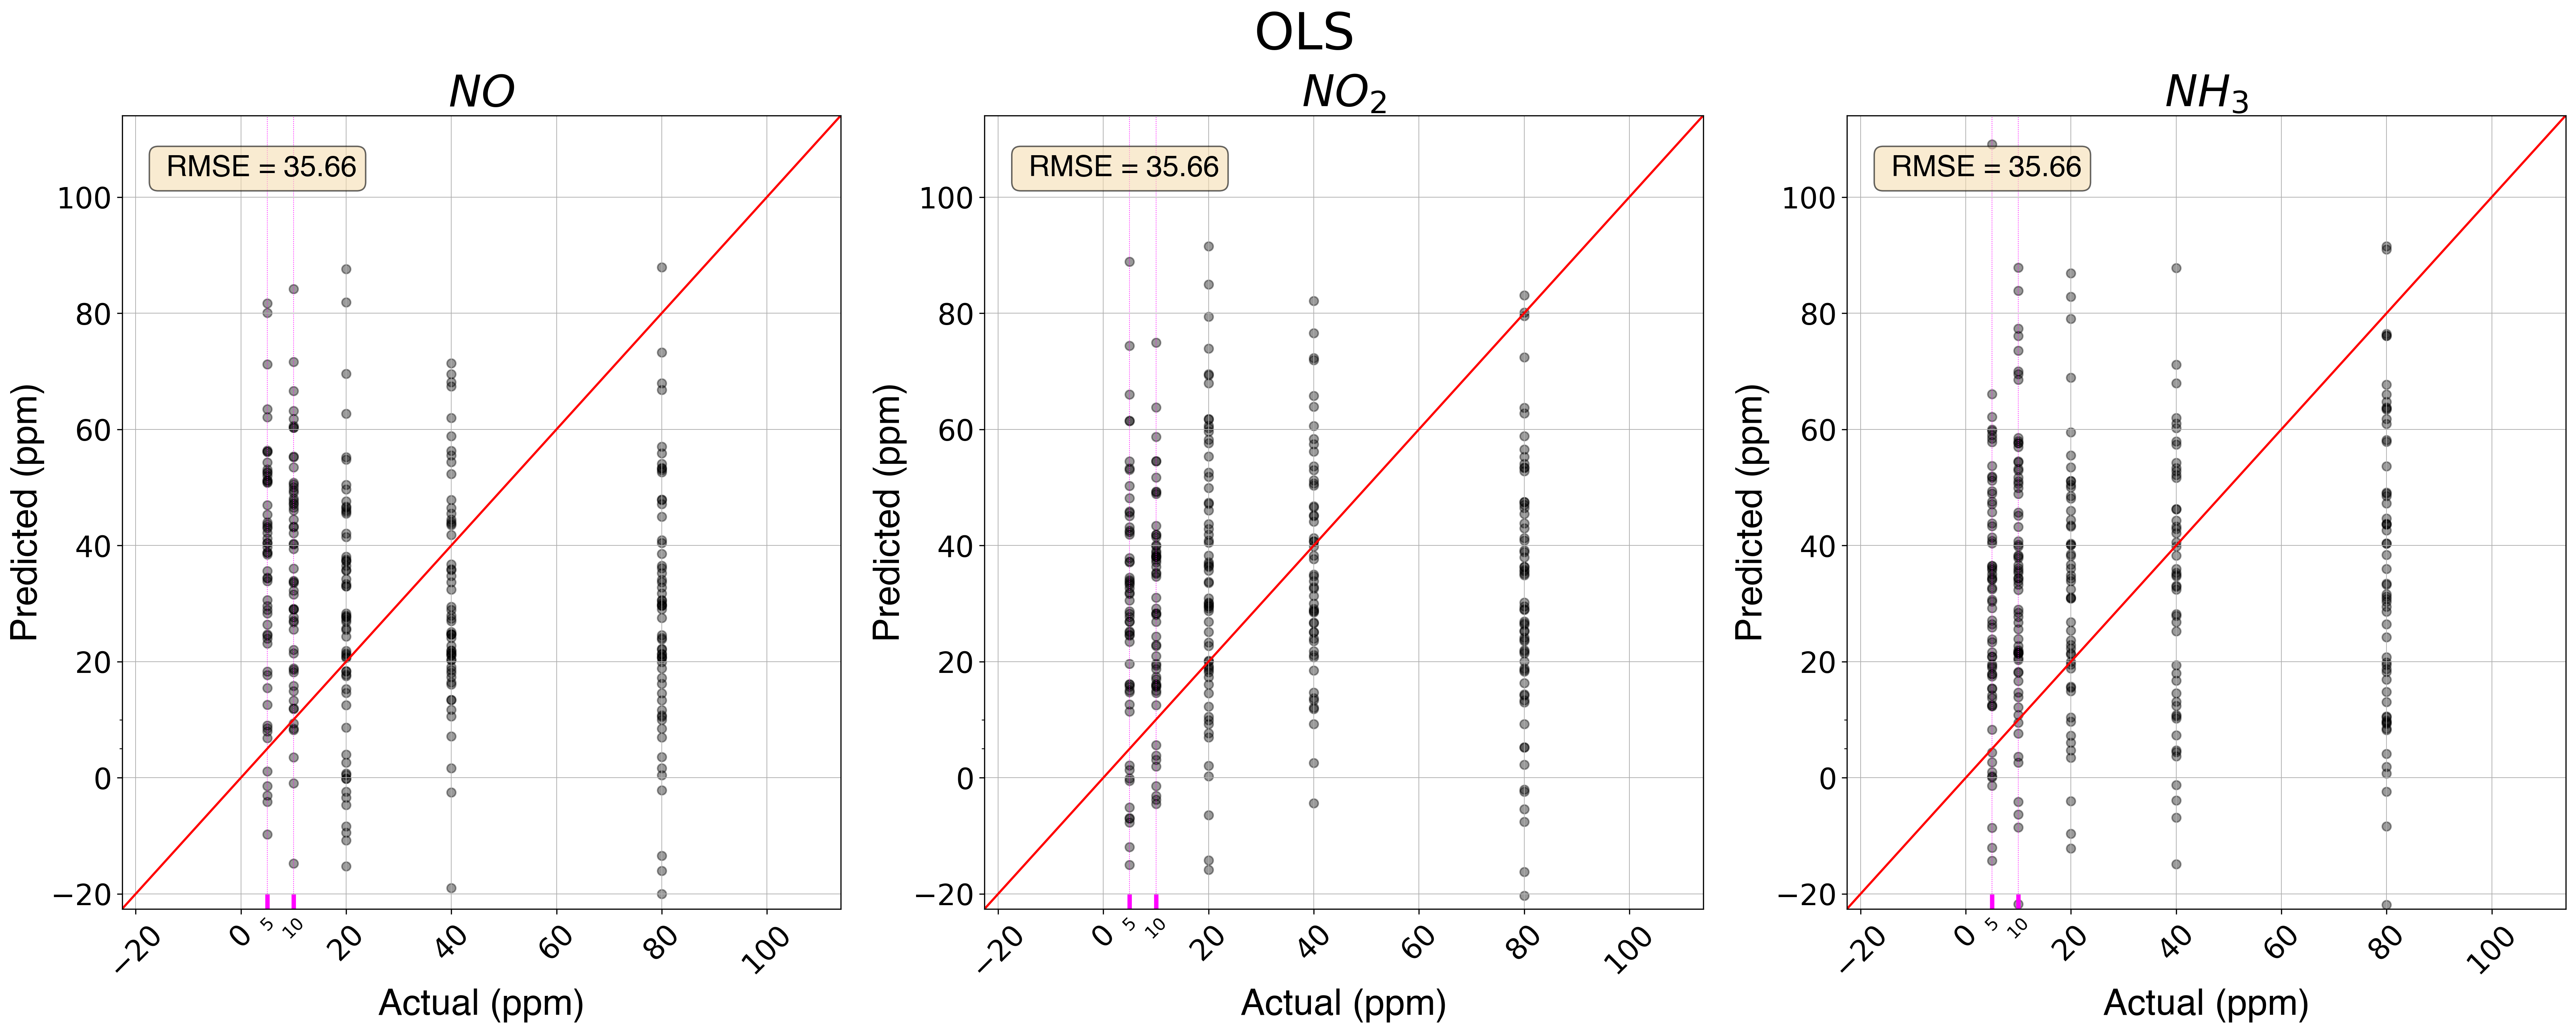

In [6]:
# Predicting on unseen validation data
Y_pred = pipe.predict(X_val)

# Plotting actual vs. predicted
# Information to display
RMSE = mean_squared_error(Y_val, Y_pred, squared=False)

info = f' RMSE = {str(round(RMSE,2))}'
plot_actual_vs_pred(Y_val, Y_pred, 'OLS', info) 